<a href="https://colab.research.google.com/github/amitoshacharya/Twitter_Sentiment_Analysis/blob/main/NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Problem Statement:*
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.

##***Data Collection***

In [163]:
#GIT CLonning to get dataset from GitHub
!git clone https://github.com/mangipudiprashanth7/Twitter_Sentiment_Analysis-Using-ML-and-NLP.git

Cloning into 'Twitter_Sentiment_Analysis-Using-ML-and-NLP'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 11), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (32/32), 2.65 MiB | 3.01 MiB/s, done.


In [164]:
%cd Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data/

/content/Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data/Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data/Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data/Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data/Twitter_Sentiment_Analysis-Using-ML-and-NLP/Data


In [165]:
!ls

test_tweets_anuFYb8.csv  train_E6oV3lV.csv


In [166]:
#Reading files
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [167]:
train_twt = pd.read_csv('train_E6oV3lV.csv')
test_twt= pd.read_csv('test_tweets_anuFYb8.csv')

In [168]:
test_twt.head() #not to be used in Any Circumstances

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [169]:
train_twt.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [170]:
tweet_df=train_twt.copy()

In [171]:
tweet_df.shape

(31962, 3)

In [172]:
tweet_df.iloc[0]

id                                                       1
label                                                    0
tweet     @user when a father is dysfunctional and is s...
Name: 0, dtype: object

In [173]:
tweet_df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

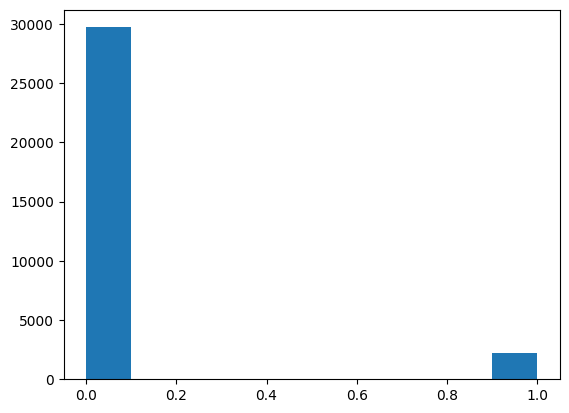

In [174]:
import matplotlib.pyplot as plt

plt.hist(tweet_df.label)
plt.show()

##***NLP Initialize***

In [175]:
#NLP Initialize
import spacy
import nltk

nlp = spacy.load(name='en_core_web_sm')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [176]:
from nltk.corpus import stopwords
#from nltk.tokenize import  WordPunctTokenizer\
from string import punctuation

In [177]:
punctuations = list(set(punctuation))
len(punctuations)

32

In [178]:
stop_wrds= list(nlp.Defaults.stop_words) + list(stopwords.words('english'))
len(list(set(stop_wrds)))

382

In [179]:
len(list(set(stop_wrds))+list(set(punctuation)))

414

In [180]:
len(tweet_df)

31962

In [181]:
stp_wrds = list(set(list(nlp.Defaults.stop_words) + list(stopwords.words('english')))) +list(set(punctuation))

In [182]:
tokens = [token.lemma_.lower() for token in nlp(tweet_df.iloc[3]['tweet']) if token.text =='#' or (token.text not in stop_wrds and token.is_alpha)]
tokens

['#', 'model', 'love', 'u', 'u', 'time']

In [183]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


##***NLP Pre-Processing***

In [184]:
#NLP Pre-Processing
#from IPython.display import display, clear_output #to update iteration display         #######commenting this func. to make program faster

##def pre_processor(data, total,iter=0): #######commenting this func. to make program faster
def pre_processor(data):
  doc=nlp(data)#WordPunctTokenizer().tokenize(data)

  #stopwords
  stp_wrds = list(set(list(nlp.Defaults.stop_words) + list(stopwords.words('english')))) +list(set(punctuation))

  #removing stopwords
  #keeping only alphabetical words
  #removing all words with less than 1 char, e.g., i, u etc.
  #converting all to lower case root words
  tokens = [token.lemma_.lower() for token in doc if  token.text not in stop_wrds and token.is_alpha and len(token.text)>2]

  #clear_output()                                #######commenting this func. to make program faster
  #display(f'Iteration {iter}/{total}') #######commenting this func. to make program faster

  return tokens #,' '.join(tokens)

print(tweet_df.iloc[3]['tweet'])
##print(pre_processor(tweet_df.iloc[3]['tweet'],2,tweet_df.iloc[3]['id'])) #######commenting this func. to make program faster
print(pre_processor(tweet_df.iloc[3]['tweet']))

print(tweet_df.iloc[1]['tweet'])
##a = pre_processor(tweet_df.iloc[1]['tweet'],2,tweet_df.iloc[1]['id']) #######commenting this func. to make program faster
##print(a)

print(pre_processor(tweet_df.iloc[1]['tweet']))


#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
['model', 'love', 'time']
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
['thank', 'lyft', 'credit', 'use', 'cause', 'offer', 'wheelchair', 'van', 'pdx', 'disapointe', 'getthanked']


###***BAG OF WORDS***

In [185]:
#Applying to data
## Creatting a BAG OF WORDS for each tweets

tweet_df['tweet_bag']= tweet_df['tweet'].apply(pre_processor)

##df_length=len(tweet_df)    #######commenting this func. to make program faster
##tweet_df['tweet_bag']= tweet_df['id'].apply(lambda id: pre_processor(data=tweet_df.iloc[id-1]['tweet'], total=df_length, iter=id))   #######commenting this func. to make program faster

In [186]:
tweet_df['tweet'] = tweet_df['tweet_bag'].apply(lambda twt: ' '.join(twt))

In [187]:
tweet_df.head()

,id,label,tweet,tweet_bag
0,1,0,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,thank lyft credit use cause offer wheelchair v...,"[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0,bihday majesty,"[bihday, majesty]"
3,4,0,model love time,"[model, love, time]"
4,5,0,factsguide society motivation,"[factsguide, society, motivation]"


##***Predictive Analytics by ML models (without ANN)***

Execution steps for less RAM consumption:

    1. Data Collection
    2. NLP Initialize
    3. NLP Pre-Processing


###***Train & Test Split***

In [125]:
from sklearn.model_selection import train_test_split

x= tweet_df.tweet
y= tweet_df.label
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=.20, shuffle=True, random_state=41)

In [126]:
x.shape, y.shape

((31962,), (31962,))

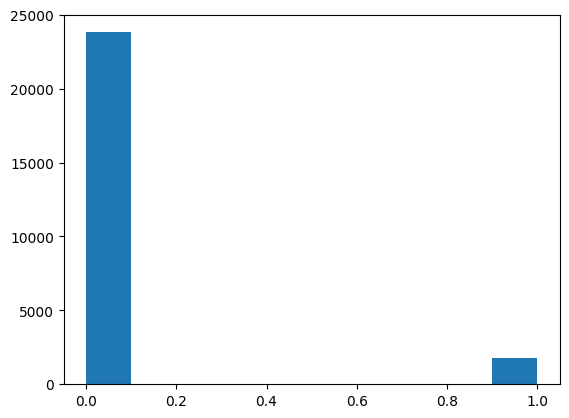

In [127]:
plt.hist(y_train)
plt.show()

*Since, we have **Imbalance dataset**. Our models will face issue while preicting label 1.*

*Therefore, we do **random sampling**.*

#### ***SMOTE***

**Synthetic Minority Oversampling Technique** is an oversampling technique but SMOTE works differently than your typical oversampling.

SMOTE works by utilizing a k-nearest neighbour algorithm to create synthetic data. SMOTE first starts by choosing random data from the minority class, then k-nearest neighbors from the data are set. Synthetic data would then be made between the random data and the randomly selected k-nearest neighbor.

In [128]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install --upgrade imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
#setting-up pipeline for the ML models
#from sklearn.pipeline import Pipeline ### not working with oversampling method
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report,mean_squared_error, recall_score,precision_score



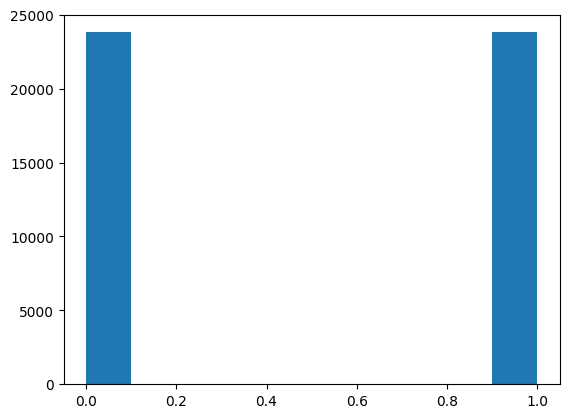

In [130]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

#Oversampling the data
pipe = Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101))])

ovr_sampler= pipe.fit(x_train,y_train)

x_ovr,y_ovr=ovr_sampler.fit_resample(x_train,y_train)
plt.hist(y_ovr)
plt.show()

###***Linear Regression***

*Linear Regression algorithm, is a simple yet powerful machine learning algorithm for predicting a continuous output variable based on one or more input variables.*

*In Linear Regression, the algorithm fits a linear equation to the input data that best represents the relationship between the input variables and the output variable. The linear equation is typically represented as y = mx + b, where y is the output variable, x is the input variable, m is the slope, and b is the intercept. The algorithm uses a method called **ordinary least squares to find the values of m and b that minimize the sum of squared errors between the predicted values and the actual values**.*

*One of the advantages of Linear Regression is that it is easy to understand and interpret, making it a popular choice for data analysis and modeling. Additionally, Linear Regression can be used for both simple and complex datasets, and it can handle both categorical and continuous input variables.*

*Overall, Linear Regression is a powerful algorithm for predicting a continuous output variable based on one or more input variables, and can be used in a variety of applications such as predicting stock prices, housing prices, and customer behavior.*



```
from sklearn.linear_model import LinearRegression

# create linear regression model
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

y_new = model.predict(X_new)

# print the predictions
print(y_new)
```



In [131]:
model_outputs={}
def model_result(model_name, pred_val):
  global model_outputs
  model_outputs[model_name] = {'accuracy':accuracy_score(y_true=y_test, y_pred=pred_val),
                              'f1_score':f1_score(y_true=y_test, y_pred=pred_val),
                              'recall':recall_score(y_true=y_test, y_pred=pred_val),
                              'precision':precision_score(y_true=y_test, y_pred=pred_val,),
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=pred_val,)}

###***Logistic Regression***

*A popular algorithm used for classification tasks.*

*It is used to predict the probability of an event occurring based on input features.*

*It is particularly useful for applications such as predicting whether an email is spam or not, or whether a patient is likely to develop a certain medical condition.*

***3 Types:***

*➢ Binomial:*

    In binomial Logistic regression, there can be only two possible types of the dependent variables, such as 0 or 1, Pass or Fail, etc.
*➢ Multinomial:*

    In multinomial Logistic regression, there can be 3 or more possible unordered types of the dependent variable, such as "cat", "dogs", or "sheep"
*➢ Ordinal:*

    In ordinal Logistic regression, there can be 3 or more possible ordered types of dependent variables, such as "low", "Medium", or "High".

In [132]:
from sklearn.linear_model import LogisticRegression

lgr_model= Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('lgr', LogisticRegression(random_state=41))]) #Pipeline td-idf ---> lgr
lgr_model.fit(x_train, y_train) # model training
lgr_pred=lgr_model.predict(x_test) # model prediction

model_result(model_name= 'LogRegress', pred_val= lgr_pred)
#model_outputs

###***Regularization***

####***LASSO and Ridge Regularization***

*➢ Variance : Variance tells us about the spread of the data points. High variance leads to **Overfitting**.*

*➢ Bias : The inability of the ML methods (like Linear Regression) to capture the true relationship is called bias. High Bias leads to **Underfitting**.*

➢ Regularization

    ➢ Regularization is one of the ways to improve our model to work on unseen data by ignoring the less important features.

    ➢ Regularization minimizes the validation loss (i.e., Cost function/ Loss function) and tries to improve the accuracy of the model.

    ➢ It avoids overfitting by adding a "penalty" to the model with high variance, thereby shrinking the beta coefficients to zero.

    ➢ 2 types:
        1. L1 Regularization (Lasso Regression)
        2. L2 Regularization (Ridge Regression)

Explanation:

    ➢ In Linear regression, after training model, Model performs well for training datasets but, fails to predict for test dataset and give huge difference b/w test data from mean or best fit line (i.e., gives high variance). Hence, model overfitting the training dataset.
    ➢ Thus, RSS is large for Linear Regression model for test dataset whereas, it was giving 0 or less error for training dataset.
    ➢ LASSO and Ridge Regression add a penalty term (i.e., λ* |slope| and λ*(slope)^2) respectively to regularize Cost function (i.e., Loss function or Residual Sum of Square (RSS) or Sum of Squared Error (SSE)).
            Note:
            Cost function = Loss function = MSE and
            RSS = SSE = (N * MSE)
    ➢ This λ term called as regularization parameter identified through Cross Validation penalizes the βi where i = 1, 2, 3, …., n (i.e., coefficients or weights or slopes) except β0 (i.e., intercept) in older linear best fit line.
    ➢ This penalty term increases the cost function at training linear model, to give an error when there is no or less error.
    ➢ Thus, this will help Gradient descent to reduce slope (βi where i = 1, 2, 3, …., n) to give new best fit line in order to reduce cost function.
    ➢ This, new best fit line reduces the high variance at time of test dataset and gives a generalize model with less error and high accuracy for both training and test dataset.
    ➢ The only difference b/w L1 and L2 regularization is that:
          1. Ridge (L2) with help of λ*(slope)2 forces all the coefficients to be small.
          2. Whereas LASSO (L1) with help of λ*|slope| forces all the coefficients to be 0.
              • Due to this, less important coefficients or weights or slopes are reduced/shrank equal to 0 (Selection in LASSO)
              • And important coefficients are reduced/shrank to small values. (Least Absolute Shrinkage in LASSO)
    ➢ Hence LASSO can be used for selection purpose also while both Ridge and LASSO shrinks the coefficient to small values to reduce cost function and give new best fit line as solution to Overfitting.



####***Elastic Net Regression***
    → So generally, we should avoid plain Linear Regression.
    → Ridge is a good default, but it includes all features even if they are not useful. (Problem with Ridge)
          ✓ We should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed.

    → In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when: (Problem with LASSO)
        ✓ The number of features is greater than the number of training instances or
        ✓ when several features are strongly correlated (i.e., Multicollinearity is not considered in LASSO’s feature regularization).

    → For Elastic Net use, both L1 and L2 regularizations to produce most optimized output. (Overcoming both Ridge and LASSO limitation by combining them both)
    → In addition to setting and choosing a lambda value elastic net also allows us to tune the alpha parameter where
    ✓ 𝞪 = 0 ➔ Ridge and,
    ✓ 𝞪 = 1 ➔ LASSO
    → Simply put plug in 0 for alpha, the penalty function reduces to the L1 (ridge) term and if we set alpha to 1 we get the L2 (lasso) term.
    → So, keeping 0 ≤ α ≤ 1, we can achieve benefits of both Ridge and LASSO Regressions in Elastic Net Regression.

Code:


```
from sklearn.linear_model import ElasticNetCV
elasticnet = ElasticNetCV ( )
elasticnet.fit(x_train,y_train)
```



###***Decision Tree***

*Decision Tree is used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.*

*Decision Trees are essentially tree-like structures that partition the data based on a series of simple decision rules, with each node representing a decision and each branch representing an outcome of that decision.*

*For classification tasks, a Decision Tree would start with the entire dataset, and then at each decision node, it would split the data into smaller subsets based on a feature value. This process continues recursively until each subset cannot be divided further.*

*Decision Trees can suffer from overfitting if they are allowed to grow too deep, which can lead to poor generalization performance on new data. To address this, several techniques have been developed, such as pruning, which involves removing branches from the tree, and using ensemble methods such as Random Forests, which combine the predictions of multiple Decision Trees to improve performance.*

In [133]:
from sklearn.tree import DecisionTreeClassifier

dt_model= Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('dt', DecisionTreeClassifier(random_state=41))]) #Pipeline td-idf ---> dt
dt_model.fit(x_train, y_train) # model training
dt_pred=dt_model.predict(x_test) # model prediction

model_result(model_name= 'DecisionTree', pred_val= dt_pred)
#model_outputs

###***Random Forest***

*It is a popular ensemble learning technique used for both **regression** and **classification** tasks.*

*Random forests uses bagging method to combine multiple decision trees, where each tree is trained on a random subset of the data and a random subset of the input features.*

*Then output of each decision tree in a random forest is combined using a simple **majority vote (for classification tasks)** or **averaging (for regression tasks)**. This helps to reduce the risk of overfitting and improve the accuracy of the algorithm as compare to Decision Tree.*

*Overall, **random forests are powerful and widely used** algorithms in ML, particularly in applications **where the input features are noisy or correlated**. The use of bagging ensemble techniques and combining the outputs of multiple decision trees help to improve the performance and robustness of the algorithm.*

In [134]:
from sklearn.ensemble import RandomForestClassifier

#n_estimators=100, 100 decision trees
#n_jobs= 2,  2 number of jobs run in parallel.
#criterion : {"gini", "entropy", "log_loss"}, default="gini" ,
#The function to measure the quality of a split.
'''##Supported criteria are "gini" for the Gini impurity (1- [P(+ve or Yes)]^2 - [P(-ve or No)^2])
##and "log_loss" and "entropy" both for the information gain.
##   Note: This parameter is tree-specific.'''
#max_depth : int, default=None. The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

rfc_model= Pipeline([('vector',TfidfVectorizer()), ('smote',SMOTE(random_state = 101)),('rfc', RandomForestClassifier(n_estimators=100, n_jobs=2, random_state=41))]) #Pipeline td-idf ---> rfc
rfc_model.fit(x_train, y_train) # model training
rfc_pred=rfc_model.predict(x_test) # model prediction

model_result(model_name= 'RandomForest', pred_val= rfc_pred)
#model_outputs

###***Naive Bayes Classifier***

*It is a popular algorithm used for classification tasks.*

*Naive Bayes is a probabilistic algorithm that makes predictions based on Bayes' theorem, which calculates the probability of a hypothesis based on the probability of the evidence.*

*Naive Bayes Classifier assumes that the input features are independent of each other, which is a "naive" assumption but often works well in practice. The algorithm calculates the probability of each class given the input features, and selects the class with the highest probability as the prediction.*

*Furthermore, Naive Bayes is particularly useful for applications with a large number of input features, such as NLP or spam filtering. It is also computationally efficient, making it a popular choice for real-time applications.*

In [135]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

nb_model = Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('nb', MultinomialNB())]) #Pipeline td-idf ---> nb
nb_model.fit(x_train,y_train) # model training
nb_pred=rfc_model.predict(x_test) # model prediction

model_result(model_name= 'NB', pred_val= nb_pred)
#model_outputs

###***Support Vector Machine (SVM)***

*SVM are a powerful and widely used ML algorithms, used primarily for classification tasks SVC (Support Vector Classifier). In particular, the SVM algorithm seeks to find the hyperplane that maximally separates two classes of data points in a high-dimensional space.*

*SVM is a type of supervised learning algorithm and can be used for both linear and non-linear classification problems. The linear version is called **Linear SVM or Linear SVC**. Non-linear SVMs use kernel functions to transform the data into a higher-dimensional space, where a linear hyperplane can be found to separate the classes.*

*Furthermore, SVMs have several advantages, including being able to handle high-dimensional data with a small number of training samples, and being **less prone to overfitting**.*

*SVMs are well-suited for a variety of applications, such as text classification, image classification, and bioinformatics.*

In [136]:
from sklearn.svm import SVC

#kernel used here is 'rbf'
svc_model = Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('svc', SVC(random_state=41))]) #Pipeline td-idf ---> svc
svc_model.fit(x_train,y_train) # model
svc_pred=svc_model.predict(x_test) # model prediction

model_result(model_name= 'SVC', pred_val= svc_pred)
#model_outputs

###***Extreme Gradient Boosting (XGBoost)***

*XGBoost is a popular and powerful gradient boosting library used in machine learning for both regression and classification tasks, mostly for classification.*

*XGBoost is an optimized **implementation of gradient boosting** that is designed to be highly efficient and scalable.*

*Boosting is an ensemble technique that combines multiple weak models into a single strong model. It works by training a sequence of models, each one improving on the mistakes of the previous model, until a final strong model is obtained. **Gradient boosting is a specific type of boosting that uses gradients to minimize the loss function during training that enhances the accuracy of the model**.*

*In XGBoost, the gradient boosting algorithm is optimized for speed and efficiency using several techniques, including parallel processing, approximate greedy algorithm, and a customized data structure to store the input data. The library also includes several **regularization techniques (L1 &L2) to prevent overfitting and improve generalization performance**.*

*Overall, XGBoost is a powerful and widely used library in machine learning due to its efficiency, scalability, and high accuracy. It is used in a variety of applications, such as fraud detection, image classification, and customer churn prediction.*

In [137]:
from xgboost import XGBClassifier

xgb_model = Pipeline([('vector',TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('xgb', XGBClassifier(n_estimators=1000,n_jobs=2,random_state=41))]) #Pipeline td-idf ---> xgb
xgb_model.fit(x_train,y_train) # model training
xgb_pred=xgb_model.predict(x_test) # model prediction

model_result(model_name= 'XGB', pred_val= xgb_pred)
#model_outputs

###***Light GBM Model (LGBM)***

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm,

    ✓ Used for ranking, classification, and many other machine learning tasks.
    ✓ Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise.
    ✓ So, when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.
    ✓ Also, it is surprisingly very fast, hence the word ‘Light’.
    ✓ Leaf wise splits lead to increase in complexity and may lead to overfitting and
    ✓ Overfitting can be overcome by specifying another parameter max-depth which specifies the depth to which splitting will occur.

✓ Advantages of Light GBM

    ➢ Faster training speed and higher efficiency:
        • Light GBM use histogram-based algorithm i.e., it buckets continuous feature values into discrete bins which fasten the training procedure.

    ➢ Lower memory usage:
        • Replaces continuous values to discrete bins which result in lower memory usage.

    ➢ Better accuracy than any other boosting algorithm:
        • It produces much more complex trees by following leaf wise split approach rather than a level-wise approach which is the main factor in achieving higher accuracy.

        • However, it can sometimes lead to overfitting which can be avoided by setting the max_depth parameter.

    ➢ Compatibility with Large Datasets:
        • It can perform equally good with large datasets with a significant reduction in training time as compared to XGBOOST.

    ➢ Parallel learning supported
        → Bagging is also supported



In [138]:
from lightgbm import LGBMClassifier

lgbm_model = Pipeline([('vector',TfidfVectorizer()), ('smote',SMOTE(random_state = 101)),('lgbm', LGBMClassifier(n_estimators=1000,n_jobs=2,random_state=41,max_depth=-1,num_leaves=40))]) #Pipeline td-idf ---> lgbm
lgbm_model.fit(x_train,y_train) # model training
lgbm_pred=lgbm_model.predict(x_test) # model prediction

model_result(model_name= 'LGBM', pred_val= lgbm_pred)
#model_outputs

###***K- Nearest Neighbour (KNN)***

*K-Nearest Neighbors (KNN) algorithm, is a simple and widely used machine learning algorithm for classification and regression tasks.*

*In KNN, the output value for a data point is determined by the k nearest data points in the training set. The algorithm works by measuring the distance between the data points using a distance metric (such as Euclidean distance), and then selecting the k nearest neighbors based on the distance. The output value for the new data point is then determined by a **majority vote or averaging of the output values of the k neighbors**.*

*One of the advantages of KNN is that it is easy to understand and implement. Additionally, KNN is a non-parametric algorithm, which means it does not make any assumptions about the underlying distribution of the data. However, KNN can be computationally expensive for large datasets, and the performance can be sensitive to the choice of k and the distance metric.*

*Overall, KNN is a simple yet powerful algorithm that can be effective for a wide range of classification and regression tasks, especially for small to medium-sized datasets.*



In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [140]:
#finding best k-value
def find_best_k(x, y,scoring_param):
    k_range = range(1, 6)
    k_scores = []
    print('Finding best k value:')
    for k in k_range:
        print(f'For k = {k}',end='    -------------------->>>>>    ') #To Track
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x, y, cv=10, scoring=scoring_param)  #k value using cross-validation (K-Fold CV). Here, 10-Fold CV
        print(f'{scoring_param} = ',scores.mean()) #To Track
        k_scores.append(scores.mean())

    best_k = k_range[np.argmax(k_scores)]
    return best_k

#vectorizor=TfidfVectorizer()
#x_data=vectorizor.fit_transform(x_train)
#x,y=find_best_k(x_data,y_train)

In [141]:
#pipeline with TF-IDF vectorization and KNN classifier
knn_model = Pipeline([('vectorizer', TfidfVectorizer()),('smote',SMOTE(random_state = 101)), ('knn', KNeighborsClassifier())])

# Train the model using the best k value
knn_model.fit(x_train, y_train)

#setting best k value to the model
knn_model.set_params(knn__n_neighbors=find_best_k(x= knn_model['vectorizer'].transform(x_train), y= y_train, scoring_param='accuracy'))

# Use function to find best k value used in 'knn'
n = knn_model.named_steps['knn'].n_neighbors
print(f'Number of N-neighbours = {n}')

#Model Train
knn_model.fit(x_train, y_train)

# Make predictions on the test set
knn_pred = knn_model.predict(x_test)

#model_outputs
model_result(model_name= 'KNeighbors', pred_val= knn_pred)


Finding best k value:
For k = 1    -------------------->>>>>    accuracy =  0.9520512594534749
For k = 2    -------------------->>>>>    accuracy =  0.9435253221847051
For k = 3    -------------------->>>>>    accuracy =  0.9432515332729878
For k = 4    -------------------->>>>>    accuracy =  0.9407094153151648
For k = 5    -------------------->>>>>    accuracy =  0.9406703069850904
Number of N-neighbours = 1


###***K-Means***

    Used to find target variable, so as it could further pass through supervised ML algo.

*K-Means algorithm, is a popular unsupervised machine learning algorithm for clustering data points into K clusters based on their similarity.*

*In K-Means, the algorithm iteratively partitions the data points into K clusters by minimizing the sum of squared distances between the data points and their assigned cluster centroids.*

*The algorithm starts by randomly selecting K data points as the initial centroids, then assigns each data point to the nearest centroid, and updates the centroids based on the mean of the assigned data points. This process repeats until convergence, which occurs when the centroids no longer change significantly.*

*One of the advantages of K-Means is that it is relatively fast and scalable, making it suitable for large datasets. However, K-Means can be sensitive to the choice of the initial centroids, and the algorithm may converge to a suboptimal solution if the initial centroids are not representative of the data*.

*Overall, K-Means is a powerful algorithm for clustering data points into K groups based on their similarity, and can be used in a variety of applications such as image segmentation, customer segmentation, and anomaly detection.*

In [142]:
from sklearn.cluster import KMeans

kmeans_model =  Pipeline([('vector',TfidfVectorizer()), ('kmeans', KMeans(random_state=41))]) #Pipeline td-idf ---> kmeans

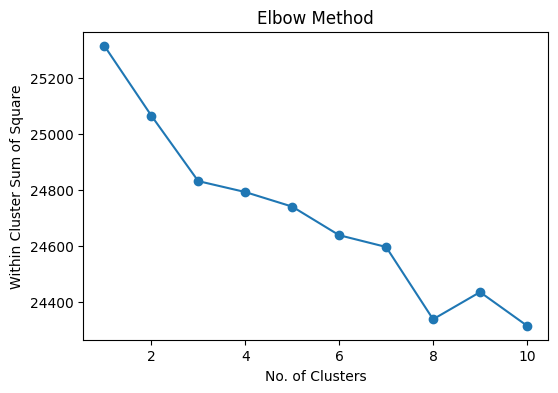

In [143]:
#finding WCSS, Within Cluster Sum of Square --> Square Sum of Eucledian distances between each points in a cluster from the centroid of that cluster
wcss=[]
cluster_range = range(1,11)
for k in cluster_range:
  #setting k no. of clusters to the model
  kmeans_model.set_params(kmeans__n_clusters=k)
  kmeans_model.fit(x_train)
  wcss.append(int(kmeans_model['kmeans'].inertia_))

plt.figure(figsize=(6,4))
plt.plot(cluster_range,wcss,marker='o')
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.title('Elbow Method')

plt.show()

In [144]:
#best no. of cluster is 3
best_n_cluster=1
kmeans_model.set_params(kmeans__n_clusters = best_n_cluster)
kmeans_model.fit(x_train)
kmeans_pred = kmeans_model.predict(x_test)

#model_outputs
model_outputs['KMeans'] = {'accuracy':accuracy_score(y_true=y_test, y_pred=kmeans_pred),
                              'recall':recall_score(y_true=y_test, y_pred=kmeans_pred,average='weighted'),
                              'precision':precision_score(y_true=y_test, y_pred=kmeans_pred,average='weighted'),
                              'f1_score':f1_score(y_true=y_test, y_pred=kmeans_pred,average='weighted'),         #Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].
                              'mean_squared_error':mean_squared_error(y_true=y_test, y_pred=kmeans_pred)}


###***Model Outputs***

In [145]:
ml_model_df = pd.DataFrame(model_outputs).T
ml_model_df

,accuracy,f1_score,recall,precision,mean_squared_error
LogRegress,0.905209,0.570822,0.822449,0.437093,0.094791
DecisionTree,0.943219,0.640238,0.659184,0.622351,0.056781
RandomForest,0.959643,0.712695,0.653061,0.784314,0.040357
NB,0.959643,0.712695,0.653061,0.784314,0.040357
SVC,0.949789,0.607099,0.506122,0.758410,0.050211
XGB,0.956671,0.697268,0.651020,0.750588,0.043329
LGBM,0.956359,0.693069,0.642857,0.751790,0.043641
KNeighbors,0.515407,0.230502,0.946939,0.131222,0.484593
KMeans,0.923354,0.886558,0.923354,0.852582,0.076646


######LOGIC ---> Model Building

In [146]:
def model_metrics(df, metric, rev_cond):
  '''model_accuracy=list(df[df['accuracy']==max(df['accuracy'])].index)
  model_f1score=list(df[df['f1_score']==max(df['f1_score'])].index)
  model_mse=list(df[df['mean_squared_error']==min(df['mean_squared_error'])].index)'''

  #model_accuracy= enumerate(df.sort_values(by='accuracy',axis=0, ascending=False).index)

  # Create a dictionary to store the rankings
  rankings = {}

  # Loop through the dictionary to find the unique values and sort them in descending order
  sorted_values = sorted(set(df[metric]), reverse=rev_cond)

  # Loop through the sorted values and assign a rank to each key
  for rank, value in enumerate(sorted_values, start=1):
      # Find the keys that have this value
      keys_with_value = [list(df[df[metric]==val].index) for val in df[metric].unique() if val==value ]

      # If there's only one key with this value, add it to the rankings dictionary
      if len(keys_with_value) == 1:
          rankings[rank] = ', '.join(keys_with_value[0])
      # If there are multiple keys with this value, add them as a list
      else:
          rankings[rank] = keys_with_value[0]

  return rankings


#dict(model_metrics(ml_model_df,'accuracy',True))

######LOGIC ---> Model Output

In [147]:
ml_model_df

,accuracy,f1_score,recall,precision,mean_squared_error
LogRegress,0.905209,0.570822,0.822449,0.437093,0.094791
DecisionTree,0.943219,0.640238,0.659184,0.622351,0.056781
RandomForest,0.959643,0.712695,0.653061,0.784314,0.040357
NB,0.959643,0.712695,0.653061,0.784314,0.040357
SVC,0.949789,0.607099,0.506122,0.758410,0.050211
XGB,0.956671,0.697268,0.651020,0.750588,0.043329
LGBM,0.956359,0.693069,0.642857,0.751790,0.043641
KNeighbors,0.515407,0.230502,0.946939,0.131222,0.484593
KMeans,0.923354,0.886558,0.923354,0.852582,0.076646


In [148]:
best_model={}
# accuracy measures how well the model can classify instances into their correct categories. A higher accuracy score indicates better performance of the model. [(TP+TN)/(TP+FP+TN+FN)]
best_model['accuracy']=dict(model_metrics(ml_model_df,'accuracy',True))

#Precision measures how many of the positive predictions by the model (positive y_pred) were actually correct (correct y_test).  [TP/(TP+FP)]
#Recall measures how many of the actual positives (positive y_test) were correctly predicted by the model (correct y_pred).  [TP/(TP+FN)]
#f1-score is the harmonic mean of precision and recall, and it ranges from 0 to 1, with 1 being the best possible score. An f1-score closer to 1 indicates a better performing model. [2*precision*recall/(precision+recall)]
best_model['recall']=dict(model_metrics(ml_model_df,'recall',True))
best_model['precision']=dict(model_metrics(ml_model_df,'precision',True))
best_model['f1_score']=dict(model_metrics(ml_model_df,'f1_score',True))

#MSE measures the average squared difference between the predicted and actual values (SSE= SST-SSR). It provides a measure of the quality of the model's predictions. A lower MSE indicates better performance of the model.
# [sqrt(SSE/n)]
best_model['MSE']=dict(model_metrics(ml_model_df,'mean_squared_error',False))

ml_model_rankings = pd.DataFrame(best_model)
ml_model_rankings

,accuracy,recall,precision,f1_score,MSE
1,"RandomForest, NB",KNeighbors,KMeans,KMeans,"RandomForest, NB"
2,XGB,KMeans,"RandomForest, NB","RandomForest, NB",XGB
3,LGBM,LogRegress,SVC,XGB,LGBM
4,SVC,DecisionTree,LGBM,LGBM,SVC
5,DecisionTree,"RandomForest, NB",XGB,DecisionTree,DecisionTree
6,KMeans,XGB,DecisionTree,SVC,KMeans
7,LogRegress,LGBM,LogRegress,LogRegress,LogRegress
8,KNeighbors,SVC,KNeighbors,KNeighbors,KNeighbors


In [149]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# For Min-Max normalization
##scaler = MinMaxScaler()

# For standardization
#scaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(ml_model_df[['accuracy', 'recall','precision','f1_score', 'mean_squared_error']])
# Normalize the data
ml_model_df[['accuracy', 'recall','precision', 'f1_score', 'mean_squared_error']] = scaler.transform(ml_model_df[['accuracy', 'recall','precision', 'f1_score', 'mean_squared_error']])
ml_model_df

,accuracy,f1_score,recall,precision,mean_squared_error
LogRegress,0.877465,0.518736,0.717593,0.424021,0.122535
DecisionTree,0.963028,0.624544,0.347222,0.680837,0.036972
RandomForest,1.000000,0.734988,0.333333,0.905362,0.000000
NB,1.000000,0.734988,0.333333,0.905362,0.000000
SVC,0.977817,0.574032,0.000000,0.869452,0.022183
XGB,0.993310,0.711473,0.328704,0.858609,0.006690
LGBM,0.992606,0.705073,0.310185,0.860275,0.007394
KNeighbors,0.000000,0.000000,1.000000,0.000000,1.000000
KMeans,0.918310,1.000000,0.946497,1.000000,0.081690


##***Model Performance Visualization***

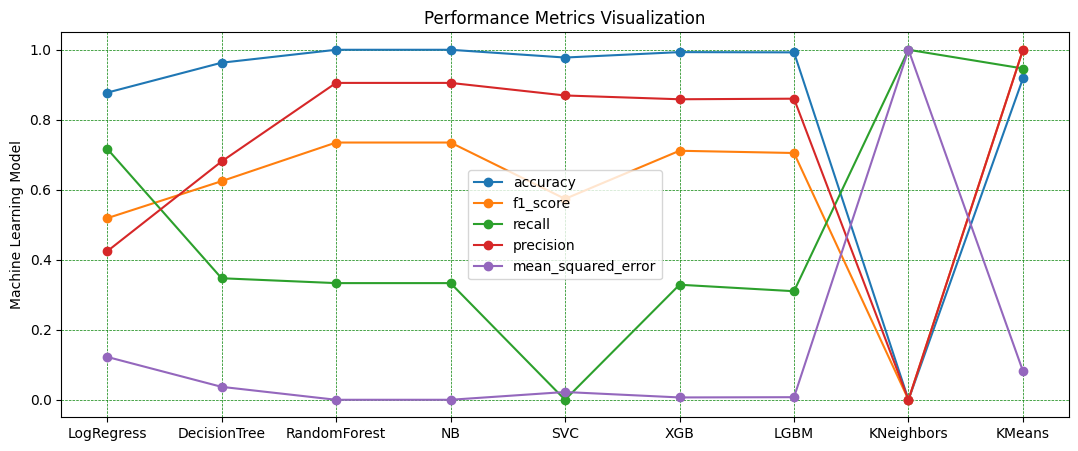

In [159]:
from matplotlib import markers
#Visualizing output
import matplotlib.pyplot as plt

x_axis = list(ml_model_df.index)
y_axis = list(ml_model_df.values)

plt.figure(figsize=(13, 5))
plt.plot(x_axis,y_axis, marker='o')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

# Add axis labels and a title
plt.ylabel('Machine Learning Model')
plt.title('Performance Metrics Visualization', loc='center')
plt.legend(ml_model_df.columns)
plt.show()

###***MODEL SELECTION:***

*In conclusion we will consider **Random forest** and **Naive Bayes** Models for our predictions.*

##***Predictive Analytics by ML models (with ANN)***

Execution steps for less RAM consumption:

    1. Data Collection
    2. NLP Initialize
    3. NLP Pre-Processing

In [188]:
tweet_df.head()

,id,label,tweet,tweet_bag
0,1,0,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,thank lyft credit use cause offer wheelchair v...,"[thank, lyft, credit, use, cause, offer, wheel..."
2,3,0,bihday majesty,"[bihday, majesty]"
3,4,0,model love time,"[model, love, time]"
4,5,0,factsguide society motivation,"[factsguide, society, motivation]"


###***INPUT Geneneration for Neural Network***

##### ***TD-IDF and Word2Vec***

*While both techniques create numerical vectors from text data:*

 *tf-idf represents the **importance of each word in a document** relative to the corpus.*

 *While word2vec represents the **semantic meaning of words based on their co-occurrence patterns.***

 https://www.guru99.com/word-embedding-word2vec.html

 *Two types: CBOW and skip-gram*




In [189]:
#Finding Vectors based on there meanings in the sentences (semantic meaning with co-occurence words)
from gensim.models import Word2Vec

#min_count=1, minimum freq should be 1
#sg = 0, if 1 for skip-gram; otherwise CBOW.
#hs : 0, If 1, hierarchical softmax will be used for model training. Otherwise, 0

wv_model =  Word2Vec(sentences=tweet_df['tweet_bag'], min_count=1, sg=0, hs=0, workers=4, vector_size=100)   #passing the output from BOW to the model
wv_model.train(tweet_df['tweet_bag'], total_examples= len(tweet_df['tweet_bag']), epochs=20)

(3967821, 4191660)

In [190]:
wv_model.wv.most_similar(positive='trump')

[('putin', 0.8908873200416565),
 ('rabid', 0.8701577186584473),
 ('donald', 0.8667173981666565),
 ('biher', 0.8490604162216187),
 ('attorneygeneral', 0.8458031415939331),
 ('vote', 0.8435459136962891),
 ('fascist', 0.8415437340736389),
 ('potus', 0.8383086323738098),
 ('nominee', 0.8346750736236572),
 ('carlpaladino', 0.8346205949783325)]

In [191]:
wv_model.wv.most_similar(negative='india')

[('witchktaft', 0.5674839019775391),
 ('ripstick', 0.5497482419013977),
 ('freunde', 0.5391538739204407),
 ('surabhirao', 0.5335718393325806),
 ('chasingdestiny', 0.5281615257263184),
 ('followforfollow', 0.5206067562103271),
 ('allthewordshavetogo', 0.5163679718971252),
 ('nextisnow', 0.5120301842689514),
 ('bribieisland', 0.5113189220428467),
 ('kheperacosplay', 0.5082827806472778)]

In [192]:
#wv_model.wv['india'] #vector representation for word 'india'

In [193]:
wv_model.vector_size #same as ---> wv_model.wv['india'].shape

100

In [194]:
import numpy as np

np.zeros(5), np.zeros((5,10))

(array([0., 0., 0., 0., 0.]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

### ***Embedding Matrix***

*Creating a embedding matrix from the Word2Vec model*

In [195]:
# Define the maximum length of a tweet
max_length = 50

# Create a function to convert text data to numerical vectors using the Word2Vec model
def vectorize_text(text):
    # Create an empty array to store the vectorized text data
    #print(text)
    vectors = np.zeros((max_length, wv_model.vector_size))
    # Loop through each word in the text data
    for i, word in enumerate(text):
        # If the word is in the Word2Vec model vocabulary, get its vector representation
        if word in wv_model.wv.key_to_index:
            vectors[i] = wv_model.wv[word]
        # If the word is not in the Word2Vec model vocabulary, use a zero vector
        else:
            vectors[i] = np.zeros(wv_model.vector_size)
    #print(vectors)
    return vectors

vectorize_text(tweet_df.iloc[3]['tweet'])

array([[-0.05543113,  0.02235935, -0.0755662 , ..., -0.06381843,
         0.04900401, -0.00880573],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08491886,  0.06123654,  0.00348486, ...,  0.02678216,
        -0.00694195,  0.04142771],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [196]:
#applying word2Vec to all rows and padding "sequences of zeros" to maintain same shape of each vector
import tensorflow as tf
tweet_df['tweet_vector'] = tweet_df['tweet_bag'].apply(vectorize_text)

tweet_df.head()

,id,label,tweet,tweet_bag,tweet_vector
0,1,0,father dysfunctional selfish drag kid dysfunct...,"[father, dysfunctional, selfish, drag, kid, dy...","[[-1.4619094133377075, -0.6655792593955994, 2...."
1,2,0,thank lyft credit use cause offer wheelchair v...,"[thank, lyft, credit, use, cause, offer, wheel...","[[-3.0116822719573975, -1.1381018161773682, 0...."
2,3,0,bihday majesty,"[bihday, majesty]","[[-0.9353019595146179, -2.8651347160339355, 0...."
3,4,0,model love time,"[model, love, time]","[[-1.1716008186340332, 1.832155704498291, -0.5..."
4,5,0,factsguide society motivation,"[factsguide, society, motivation]","[[0.07179979234933853, 0.6422023177146912, 0.1..."


In [197]:
#Train and test split
from sklearn.model_selection import train_test_split

x= tweet_df.tweet_vector
y= tweet_df.label

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=.20, shuffle=True, random_state=41)

In [198]:
# Convert the training and testing data to 3D numpy arrays
x_train = np.array([vec for vec in x_train])
x_test = np.array([vec for vec in x_test])

https://www.guru99.com/convnet-tensorflow-image-classification.html

https://chat.openai.com/c/2794ed6d-a46b-4aa2-8d66-136e4e8af8f3 set 2/4 and then study

###***CNN Architecture and Prediction***

In [199]:
from keras.models import Sequential
from keras.layers import  Embedding, Conv1D, GlobalMaxPooling1D, Dropout,Flatten, Dense,MaxPooling1D,LSTM

####***CNN Architecture***

***Conv1D layer:***

    This layer will apply filters to our word vectors to detect features. We'll use 128 filters with a kernel size of 5.

***MaxPooling1D layer:***

    This layer will reduce the dimensionality of our feature maps. We'll use a pool size of 2.
    output_shape = (input_shape - pool_size + 1) / strides)
***Flatten layer:***

    This layer will convert our 2D feature maps into a 1D vector.

***Dense layer:***

    1. The Dense layer with "n" units and ReLU activation is added in the code to perform non-linear transformations on the input data.
    2. The output of the previous layer, which is the flattened layer, contains a large number of features.
    3. The dense layer is added to reduce the number of features to a smaller and more manageable size, which improves the training performance of the model.
    4. The ReLU activation function is used to introduce non-linearity into the model,
         which allows the model to learn complex relationships between the input data and the output labels.

***Output Dense layer:***

    This layer will be our output layer, with a single neuron and a sigmoid activation function.

In [200]:
# Add convolutional layer with 128 and 64 filters, kernel size of 5 and 3, and ReLU activation
model = Sequential()

#for creating embedding matrix
#model.add(Embedding(input_dim=len(wv_model.wv.key_to_index), output_dim=wv_model.vector_size, input_length=max_length, weights=[wv_model.wv.vectors]))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(max_length, wv_model.vector_size)))

# Add max pooling layer
##pool size --> size of max pooling window
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=70, kernel_size=3, activation='relu', input_shape=(max_length, wv_model.vector_size)))
model.add(MaxPooling1D(pool_size=4))

# Flatten the output
model.add(Flatten())

# Add dense layer with 64 units/neurons and ReLU activation
model.add(Dense(units=128, activation='relu'))

#model.add(Dropout(rate=0.2))

# Add output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

In [201]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [202]:
batch_size= len(x_train)//5 ## reducing the m/m consumption
x_train.shape, x_test.shape, len(x_train), batch_size

((25569, 50, 100), (6393, 50, 100), 25569, 5113)

In [203]:
#batch_size: Integer or `None`. Trains the model for a fixed number of epochs (dataset iterations)
#In each iteration (epochs) pass the data in batches and

model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=[x_train,y_train])

Epoch 1/10
6/6 [==============================] - 20s 3s/step - loss: 0.4476 - accuracy: 0.8277 - val_loss: 0.2922 - val_accuracy: 0.9315
Epoch 2/10
6/6 [==============================] - 17s 3s/step - loss: 0.2811 - accuracy: 0.9315 - val_loss: 0.2441 - val_accuracy: 0.9315
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 0.2289 - accuracy: 0.9315 - val_loss: 0.2120 - val_accuracy: 0.9315
Epoch 4/10
6/6 [==============================] - 17s 3s/step - loss: 0.2111 - accuracy: 0.9315 - val_loss: 0.1978 - val_accuracy: 0.9315
Epoch 5/10
6/6 [==============================] - 21s 4s/step - loss: 0.1929 - accuracy: 0.9315 - val_loss: 0.1868 - val_accuracy: 0.9314
Epoch 6/10
6/6 [==============================] - 15s 3s/step - loss: 0.1859 - accuracy: 0.9323 - val_loss: 0.1862 - val_accuracy: 0.9351
Epoch 7/10
6/6 [==============================] - 17s 3s/step - loss: 0.1821 - accuracy: 0.9354 - val_loss: 0.1770 - val_accuracy: 0.9374
Epoch 8/10
6/6 [==================

In [204]:
# Make predictions on test data
y_pred = model.predict(x_test)

# Convert predictions to binary labels
y_pred = np.where(y_pred > 0.5, 1, 0)

# Evaluate the model on test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

200/200 [==============================] - 2s 8ms/step
Accuracy: 0.9341467229782575
Precision: 0.6864864864864865
Recall: 0.25918367346938775
F1 score: 0.3762962962962963
MSE: 0.06585327702174253
